In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
import pymeanshift as pms
import os, sys
from glob import glob
from PIL import Image 
import keras
import tensorflow

## Resize images

In [15]:
imgs = glob('./hair_images/*')

def resize(imgs):
    for img in imgs:
        filename = img.split('/')[2]
        filename = filename.split('.')[0]
        if filename == 'image_urls':
            continue
        if os.path.exists('./resized_hair_images/'+filename+'_resized.jpg') == True:
            continue
        im = Image.open(img)
        imResize = im.resize((300,400), Image.ANTIALIAS)
        imResize.save('./resized_hair_images/'+filename+'_resized.jpg', 'JPEG', quality=90)

resize(imgs)

In [89]:
min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([255,173,127],np.uint8)

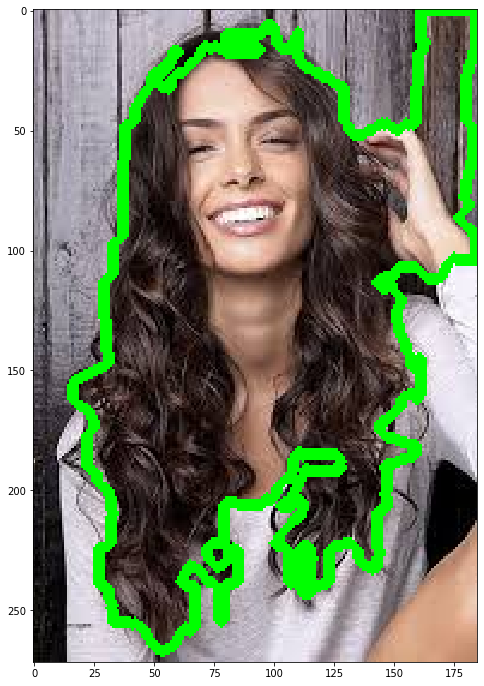

In [92]:
img = cv2.imread('wavy.jpg')

imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)

contours, hierarchy = cv2.findContours(skinRegion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contour on the source image
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    if area > 9000:
        cv2.drawContours(img, contours, i, (0, 255, 0), 3)

# Display the source image
cv2.imwrite('output1.jpg', img)
plt.figure(figsize=(12,12))
plt.imshow(img[:,:,::-1])
plt.show()

In [3]:
face_cascade = cv2.CascadeClassifier('/Users/joanna/anaconda2/envs/py37/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/joanna/anaconda2/envs/py37/lib/python3.7/site-packages/cv2/data/haarcascade_eye.xml')

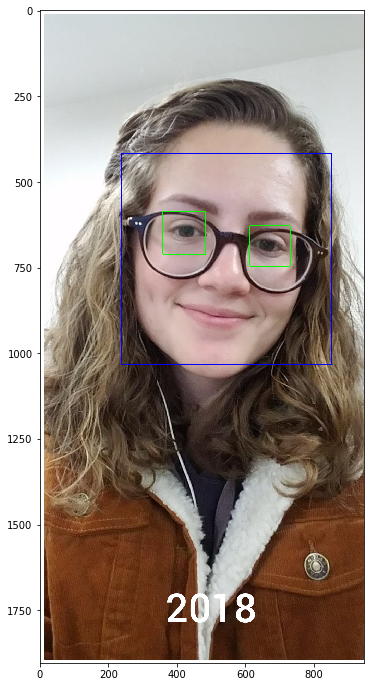

In [6]:
img = cv2.imread('hair.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=3)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray,minSize=(100, 100), maxSize=(150,150))
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imwrite('output2.jpg', img)
plt.figure(figsize=(12,12))
plt.imshow(img[:,:,::-1])
plt.show()

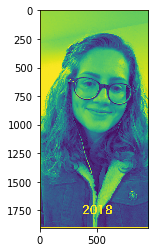

In [54]:
img = cv2.imread('hair.jpg')
img = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
cv2.imwrite('blackwhite.jpg', img)

(segmented_image, labels_image, number_regions) = pms.segment(img, spatial_radius=6, 
                                                              range_radius=4.5, min_density=1500)


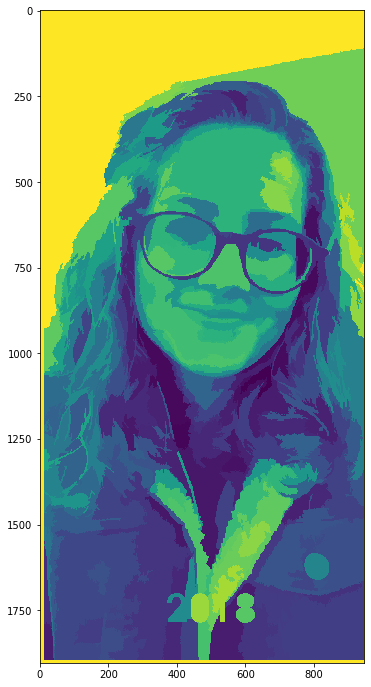

True

In [55]:
plt.figure(figsize=(12,12))
plt.imshow(segmented_image)
plt.show()

cv2.imwrite('blackwhite_seg.jpg', segmented_image)

In [38]:
print(labels_image[1500:1550, 250:300])



[[167 167 167 ... 167 167 167]
 [167 167 167 ... 167 167 167]
 [167 167 167 ... 167 167 167]
 ...
 [167 167 167 ... 167 167 167]
 [167 167 167 ... 167 167 167]
 [167 167 167 ... 167 167 167]]


In [69]:
from keras.models import Sequential 
from keras.layers import Dense, BatchNormalization, Convolution2D, Activation
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
model = Sequential()

model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Convolution2D(24, (5, 5), input_shape=(96, 96, 1), border_mode='same', init='he_normal', dim_ordering='tf'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(36, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(48, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D());

model.add(Dense(500, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(30))

/Users/joanna/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(96, 96, 1..., padding="same", data_format="channels_last", kernel_initializer="he_normal")`
  import sys
/Users/joanna/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  if __name__ == '__main__':
/Users/joanna/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5))`
  # This is added back by InteractiveShellApp.init_path()
/Users/joanna/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  del sys.path[0]
/Users

In [ ]:
model.compile(optimizer=’rmsprop’, loss=’mse’, metrics=[‘accuracy’])

checkpointer = ModelCheckpoint(filepath=’face_model.h5', verbose=1, save_best_only=True)

epochs = 30

hist = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

In [70]:
from keras.models import Model 
from keras.layers import Dropout, Dense, BatchNormalization
from keras.applications.mobilenet_v2 import MobileNetV2

def build_model(num_features):
  base = MobileNetV2(input_shape=(224, 224, 3),
                     weights=None,
                     include_top=False,
                     pooling='avg')  # GlobalAveragePooling 2D
  
  # model top
  x = base.output
  x = Dense(1536, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.3)(x)
  top = Dense(num_features, activation='sigmoid')(x)
  
  return Model(inputs=base.input, outputs=top)

In [71]:
model = build_model(num_features=celeba.num_features)
model.summary()

NameError: name 'celeba' is not defined

In [1]:
import cv2
import cv2
import numpy as np
from matplotlib import pyplot as plt

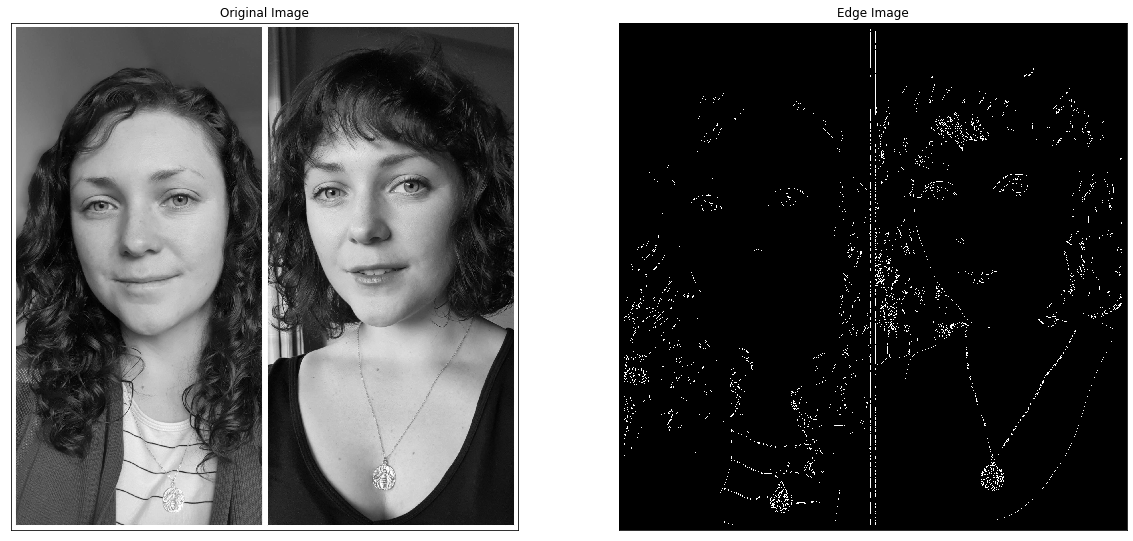

In [9]:
img = cv2.imread('hair_images/903ff49749.jpg',0)
edges = cv2.Canny(img,100,250)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [17]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
     
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

imagePath = 'hair_images/903ff49749.jpg'
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)


In [18]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
 
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

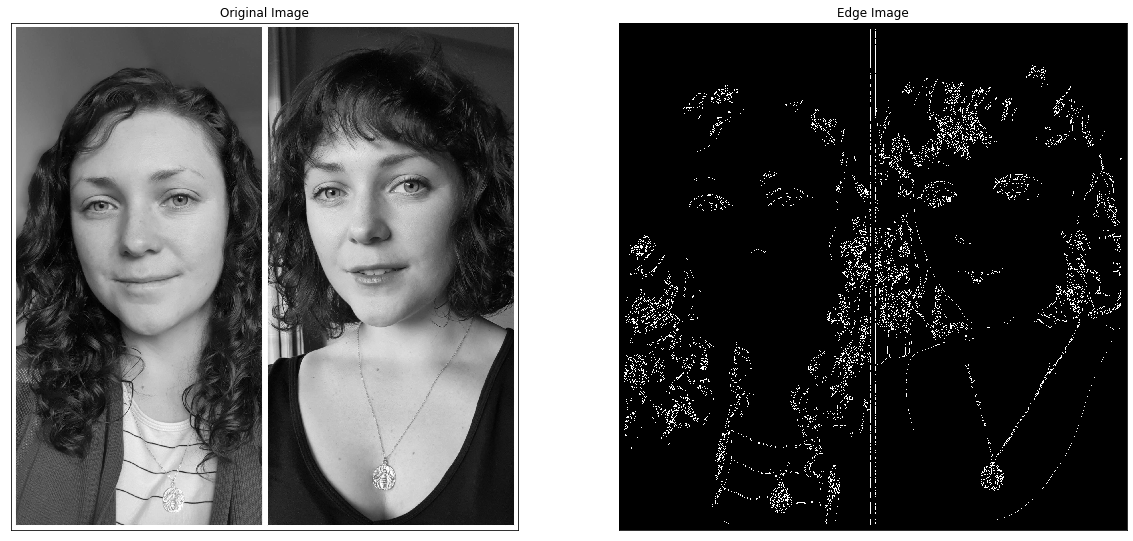

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(wide,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()